## Schema d'Euler explicite

### Introduction

Dans ce notebook Jupyter, nous allons implémenter le shema d'Euler explicite pour l'intégration des équations différentielles ordinaires de type:

$$\dot x = f(x)$$

Le schema numérique se base sur le développement limité à l'ordre 1 d'une solution $\phi(t)$ de l'EDO autour du temps initial $t_0$ pour calculer la solution à un temps $t_0+h$ avec $h$ petit :

$$\phi(t_0+h) = \phi(t_0) + \frac{d \phi(t_0)}{dt} (t_0+h-t_0) + o(|t_0+h-t_0|)$$

En exploitant le fait que $\phi(t)$ est solution de l'EDO, on obtient :

$$\phi(t_0+h) = \phi(t_0) + f(\phi(t_0))h+o(h)$$

qui nous donne une valeur approchée de la solution $\phi(t)$ en $t=t_0+h$.

En itérant depuis $\phi(t_0+h)$, on obtient une valeur approchée de la solution en $t=t_0+2h$ et ainsi de suite de proche en proche tous les pas de temps $h$.

---
### Principe de l'algorithme

Pour calculer une approximation numérique de la solution au problème de Cauchy:

$$\begin{array}{l}
\dot x = f(x),\\
x(t_0) = x_0,
\end{array}$$

sur l'intervalle de temps $[t_0, t_f]$ tous les pas de temps $h$, nous allons construire:
- un vecteur `tspan` qui balayera le temps depuis $t_0$ jusque $t_f$ tous les pas de temps $h$
- un vecteur `phi` qui sera l'approximation numérique de la solution le long du vecteur temps `tspan` et qui sera construit de manière itérative ainsi :
    - la première coordonnée de phi est $x_0$
    - la coordonnée $(i+1)$ de `phi` est égale à la coordonnée $i$ de `phi` additionnée à $f(.)$ appliquée à la coordonnée $i$ de `phi` multipliée par le pas de temps $h$: `phi[i+1] = phi[i] + f(phi[i])*h`

---
### Algorithme avec Python

Nous nous baserons sur l'exemple :

$$\dot x = rx.$$

Pour créer un vecteur de type `tspan` et représenter graphiquement nos calculs, nous importons les modules `numpy` et `matplotlib`


In [1]:
# import des modules numpy, matplotlib avec les alias usuels np et plt
import numpy as np
import matplotlib.pyplot as plt

Nous définissons les paramètres liés au temps :

In [2]:
 # parametres liés au temps
t0 = 0       # temps initial
tf = 5       # temps final
h = .01       # pas de temps de tspan

Ce qui permet de définir l'array `tspan` en utilisant la fonction `arange` de `numpy` :

In [3]:
tspan = np.arange(start = t0, stop = tf, step = h)   # l'utilisation est assez explicite je pense
tspan[:10]                                           # on vérifie ce qui est généré

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

On définit ensuite les paramètres de l'EDO (ici $r$) et la condition initiale $x_0$ :

In [4]:
# paramètre(s) de l'EDO
r = 1        # par exemple

# condition initiale
x0 = 1       # par exemple

---
Nous sommes prêt pour générer notre approximation de la solution `phi`. 
 
Pour cela nous allons faire une boucle sur le temps `tspan`, et ajouter à chaque itération à la fin de l'array `phi` le résultat de notre approximation (cf. plus haut) après avoir initialisé l'array `phi` en $x_0$. 

Pour cela nous utilisons la méthode `append()` des objets array de Python, qui colle la valeur entrée en argument à la fin de l'array.

In [5]:
phi = np.array([x0])    # nous initialisons phi sous la forme d'un array (d'où les crochets) en x0

for t in tspan[1:]:
    next_phi = phi[-1] + (r * phi[-1])*h      # a chaque iteration (i.e. pour chaque pas de temps) nous calculons phi au temps t+h, à partir de la valeur
                                              # de phi à la fin de l'array (i.e. au temps t)
    phi = np.append(phi, next_phi)            # nous reassignons dans phi l'array construit a partir du phi calculé à l'itération precedente (de t0 à t)
                                              # et de phi au temps t+h

Cette méthode basée sur `np.append` fonctionne :

In [6]:
phi[:10]       # on evalue le calcul fait

array([1.        , 1.01      , 1.0201    , 1.030301  , 1.04060401,
       1.05101005, 1.06152015, 1.07213535, 1.08285671, 1.09368527])

**Cette méthode est cependant dramatiquement peu efficace a cause de l'utilisation de `np.append` crée une copie de l'array `phi` à chaque itération.**

---
Il est préférable de créer un array `phi` de la bonne taille initiale, et de lui spécifier ensuite la valeur de chacun de ses éléments en modifiant les éléments du tableau en place.

In [7]:
phi2 = np.zeros(tspan.shape)    # nous initialisons phi sous la forme d'un array (d'où les crochets) en x0

phi2[0] = x0

for i in range(len(tspan[:-1])):
    phi2[i+1] = phi2[i] + r * phi2[i] * h

In [8]:
phi2[:10]

array([1.        , 1.01      , 1.0201    , 1.030301  , 1.04060401,
       1.05101005, 1.06152015, 1.07213535, 1.08285671, 1.09368527])


Les deux calculs sont les mêmes, mais le second va presque 10 fois plus vite !

In [9]:
%%timeit

phi = np.array([x0])    # nous initialisons phi sous la forme d'un array de la taille de tspan

for t in tspan[1:]:
    next_phi = phi[-1] + (r * phi[-1])*h      # a chaque iteration (i.e. pour chaque pas de temps) nous calculons phi au temps t+h, à partir de la valeur
                                              # de phi à la fin de l'array (i.e. au temps t)
    phi = np.append(phi, next_phi)            # nous reassignons dans phi l'array construit a partir du phi calculé à l'itération precedente (de t0 à t)
                                              # et de phi au temps t+h

1.25 ms ± 28.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%%timeit

phi2 = np.zeros(tspan.shape)    # nous initialisons phi sous la forme d'un array de la taille de tspan

phi2[0] = x0

for i in range(len(tspan[:-1])):
    phi2[i+1] = phi2[i] + r * phi2[i] * h

115 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


---
### Pour terminer, représentation graphique

en utilisant la fonction `plot()` de `matplotlib` :

Text(0.5, 0, 'Temps $t$')

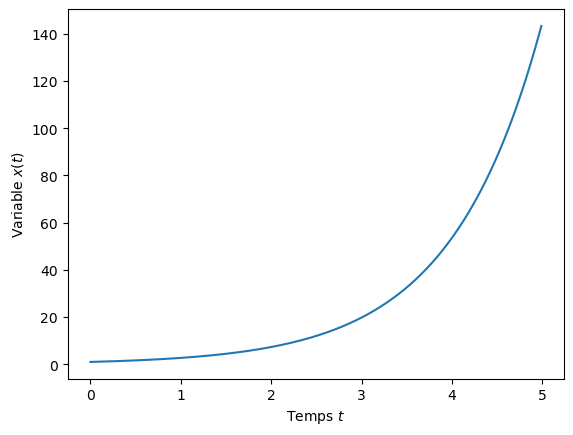

In [11]:
plt.plot(tspan, phi2)

plt.ylabel('Variable $x(t)$')
plt.xlabel('Temps $t$')

---
### Allons un peu plus loin


**On pourrait améliorer ce code de bien des façons, notamment :**
- faire une/des fonctions pour l'EDO à résoudre numériquement
- faire une fonction qui réalise la résolution numérique de l'EDO

les deux choses sont relativement simples à faire

In [12]:
# une equation différentielle simple \dot x = 2*x
def lineaire(x, r=1):
    return r*x

In [13]:
# une equation différentielle plus compliquée \dot x = x*(1-x/10)
def logistique(x, r=1, K=10):
    return r*x*(1-x/K)

In [14]:
# une fonction qui intègre une équation différentielle
def mon_integrateur_euler(mon_edo):
    psi = np.zeros(tspan.shape)
    psi[0] = x0

    for i in range(len(tspan[:-1])):
        psi[i+1] = psi[i] + mon_edo(psi[i]) * h

    return psi

---
Intégrons maintenant l'EDO linéaire :

Text(0.5, 0, 'Temps $t$')

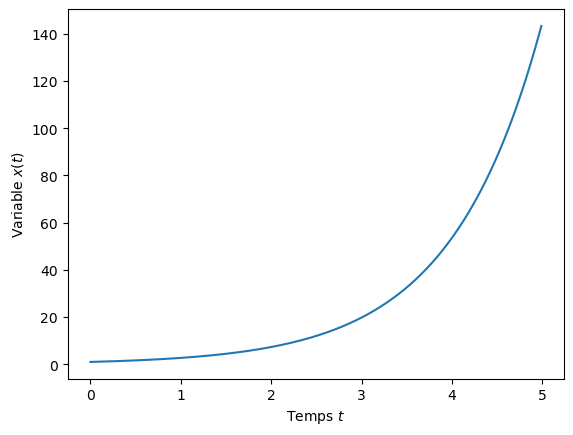

In [15]:
phi3 = mon_integrateur_euler(lineaire)

plt.plot(tspan, phi3)

plt.ylabel('Variable $x(t)$')
plt.xlabel('Temps $t$')

---
Intégrons l'EDO logistique :

Text(0.5, 0, 'Temps $t$')

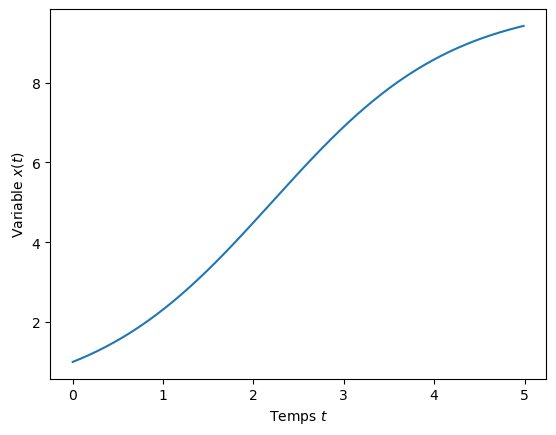

In [16]:
phi_else = mon_integrateur_euler(logistique)

plt.plot(tspan, phi_else)

plt.ylabel('Variable $x(t)$')
plt.xlabel('Temps $t$')

---

## Utilisation de la routine `odeint` de numpy

Bien des schemas numériques plus précis que l'algorithme d'Euler existent. Une partie est accessible via la routine d'intégration de `scipy.integrate`.

In [17]:
# import de la fonction odeint
from scipy.integrate import odeint

In [18]:
def lineaire_odeint(x, t):
    xdot = r*x
    return xdot

In [19]:
# intégration proprement dite
simul = odeint(lineaire_odeint, x0, tspan, hmax=h)

In [20]:
# différence entre la solution mathématique et la simulation
diff0 = x0*np.exp(r*tspan) - phi3  # euler
diff1 = x0*np.exp(r*tspan) - simul.flatten()  # via odeint

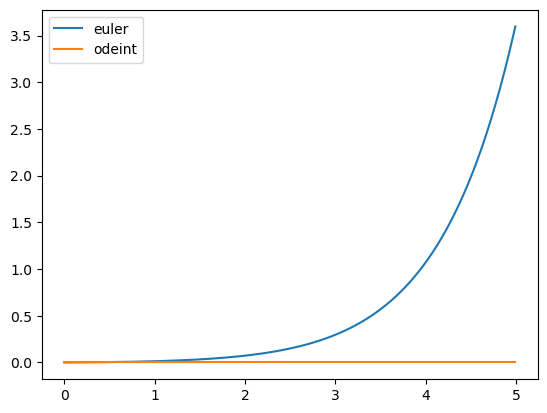

In [21]:
plt.plot(tspan, diff0, 'C0', label='euler')
plt.plot(tspan, diff1,'C1', label='odeint')

plt.legend()